<a href="https://colab.research.google.com/github/PGCodehub/MultiObjectTracking/blob/master/MultiObjectTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intial code after serval expermintaion for pytorch


In [1]:
from PIL import Image

#workaround

!pip install --no-cache-dir -I pillow
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
print("done!")
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

print("done!")


     |████████████████████████████████| 2.1MB 6.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


done!
done!


In [1]:
#PYDRIVE AND GOOGLE AUTHENTICATION CELL

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
driveauth = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 6.7MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from pathlib import Path

drive_path = Path('/content/gdrive/My Drive/')

#utils for tensorflow

In [4]:
%cd /content/ 

/content


In [5]:
!ls

adc.json  gdrive  sample_data


In [6]:
!apt-get install -y -qq protobuf-compiler python-pil python-lxml
!git clone https://github.com/tensorflow/models.git
!apt-get -qq install libprotobuf-java protobuf-compiler
!cp -R models/research/object_detection/ object_detection/
!protoc object_detection/protos/*.proto --python_out=.

Selecting previously unselected package python-bs4.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [7]:
% cd models/research/
! protoc object_detection/protos/*.proto --python_out=.
% cd /content/

/content/models/research
/content


In [8]:
import sys
sys.path.append('/content/models/research/slim')
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


#imports

In [9]:
%cd /content/

/content


In [0]:
import numpy as np
import pandas as pd

import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import time
import random
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
#from object_detection.utils import ops as utils_ops
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
%matplotlib inline

In [0]:
from __future__ import division, print_function, absolute_import

import os
from timeit import time
import warnings
import sys
import cv2
import shutil


#data

In [13]:
%cd /content/
!ls

/content
adc.json  gdrive  models  object_detection  sample_data


In [0]:
!cp /content/gdrive/My\ Drive/data.tar.gz /content/

In [0]:
!cp /content/gdrive/My\ Drive/Insight-MVT_Annotation_Train_Masked.tar.gz /content/

In [16]:
!ls

adc.json     Insight-MVT_Annotation_Train_Masked.tar.gz  sample_data
data.tar.gz  models
gdrive	     object_detection


In [0]:
!tar -xzf data.tar.gz

In [0]:
!tar -xzf /content/Insight-MVT_Annotation_Train_Masked.tar.gz

In [19]:
!ls

adc.json     gdrive					 object_detection
content      Insight-MVT_Annotation_Train_Masked.tar.gz  sample_data
data.tar.gz  models


In [0]:
!mv /content/content/Insight-MVT_Annotation_Train_Masked /content/

In [0]:
!mv /content/content/data /content/

#Github_setup

In [40]:
%cd /content/
!ls

/content
adc.json     gdrive					 object_detection
content      Insight-MVT_Annotation_Train_Masked	 sample_data
data	     Insight-MVT_Annotation_Train_Masked.tar.gz
data.tar.gz  models


In [41]:
!git clone https://github.com/PGCodehub/MultiObjectTracking.git

Cloning into 'MultiObjectTracking'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 2), reused 23 (delta 2), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [42]:
!ls

adc.json     gdrive					 MultiObjectTracking
content      Insight-MVT_Annotation_Train_Masked	 object_detection
data	     Insight-MVT_Annotation_Train_Masked.tar.gz  sample_data
data.tar.gz  models


In [43]:
%cd /content/MultiObjectTracking/Reidentification_models

!ls

/content/MultiObjectTracking/Reidentification_models
mars-small128.pb


#Tracking

In [64]:
%cd /content/MultiObjectTracking/


/content/MultiObjectTracking


In [0]:


# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.

#with trained checkpoint
PATH_TO_CKPT = '/content/data/new_output_inference_graphs' + '/frozen_inference_graph.pb'

#with no training check
#PATH_TO_CKPT = '/content/faster_rcnn_resnet101_coco_2018_01_28/frozen_inference_graph.pb'


# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/content/data', 'labelmap.pbtxt')

NUM_CLASSES = 5

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




In [47]:
category_index

{1: {'id': 1, 'name': 'Car'},
 2: {'id': 2, 'name': 'bus'},
 3: {'id': 3, 'name': 'truck'},
 4: {'id': 4, 'name': 'van'},
 5: {'id': 5, 'name': 'others'}}

In [0]:
#helper functions

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
def getimages(inputtype, path, Maxno , clean):

  if(inputtype == "folder"):

    PATH_TO_TEST_IMAGES_DIR = path

    test_images = sorted(os.listdir(PATH_TO_TEST_IMAGES_DIR))

    if Maxno != None:

      noofimgs = Maxno
    else :

      noofimgs = len(test_images)


    TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, test_images[i]) for i in range(noofimgs) ]
    
    sample_image = Image.open(TEST_IMAGE_PATHS[0])

    FRAME_WIDTH , FRAME_HEIGHT = sample_image.size

    return TEST_IMAGE_PATHS , FRAME_WIDTH , FRAME_HEIGHT
 

  elif(inputtype == "video"):

    if os.path.isfile(path):
      
      video_capture = cv2.VideoCapture(path)
    else:
      
      raise Exception("File %s doesn't exist!" % path)

    FRAMES_DIR = "Inputvideodir"

    if clean:
      if os.path.isdir(FRAMES_DIR):
        
        shutil.rmtree(FRAMES_DIR)

    if not os.path.isdir(FRAMES_DIR):
      
      os.mkdir(FRAMES_DIR)

    

    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print("Frame count estimate is %d" % total_frames)

    num = 0
    while video_capture.get(cv2.CAP_PROP_POS_FRAMES) < video_capture.get(cv2.CAP_PROP_FRAME_COUNT):
      
      success, image = video_capture.read()
      if success:
        num = int(video_capture.get(cv2.CAP_PROP_POS_FRAMES))
        print("Writing frame {num} of {total_frames}".format(
              num=num, total_frames=total_frames), end="\r")
        cv2.imwrite('{frames_dir}/frame_{num:05d}.jpg'.format(
              frames_dir=FRAMES_DIR, num=num), image)
      else:
        
        # TODO: If this happens, we need to add retry code
        raise Exception('Error writing frame_{num:05d}.jpg'.format(
            num=int(video_capture.get(cv2.CAP_PROP_POS_FRAMES))))

    print("\nWrote {num} frames".format(num=num))

    FRAME_FPS = int(video_capture.get(cv2.CAP_PROP_FPS))
    FRAME_WIDTH = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    FRAME_HEIGHT = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    ROI_YMAX = int(round(FRAME_HEIGHT * 0.75))  # Bottom quarter = finish line

    video_capture.release()
    

    PATH_TO_TEST_IMAGES_DIR = './Inputvideodir'

    test_images = sorted(os.listdir(PATH_TO_TEST_IMAGES_DIR))

    if Maxno != None:

      noofimgs = Maxno
    else :

      noofimgs = len(test_images)


    TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, test_images[i]) for i in range(noofimgs) ]
    
    return TEST_IMAGE_PATHS , FRAME_WIDTH , FRAME_HEIGHT



In [0]:
from deep_sort import preprocessing
from deep_sort import nn_matching
from deep_sort.detection import Detection
from deep_sort.tracker import Tracker
from tools import generate_detections as gdet
from deep_sort.detection import Detection as ddet

from PIL import Image, ImageDraw , ImageFont

warnings.filterwarnings('ignore')

def Multiobjecttracking( path,video ,outfile,clean = False,writetovideo = False, Maxno = None,category_index = category_index):

   # Definition of the parameters
    max_cosine_distance = 0.3
    nn_budget = None
    nms_max_overlap = 1.0
    
   # deep_sort 
    model_filename = 'Reidentification_models/mars-small128.pb'
    encoder = gdet.create_box_encoder(model_filename,batch_size=1)
    
    metric = nn_matching.NearestNeighborDistanceMetric("cosine", max_cosine_distance, nn_budget)
    tracker = Tracker(metric)

    if(video):
      Imagepaths , framewidth , frameheight  = getimages("video" , path , Maxno, clean)
    else:
      Imagepaths , framewidth , frameheight  = getimages("folder", path ,Maxno, clean)

    if(writetovideo):
      
      w = framewidth
      h = frameheight
      outputfilename = outfile + ".avi"
      fourcc = cv2.VideoWriter_fourcc(*'MJPG')
      out = cv2.VideoWriter(outputfilename, fourcc, 15, (w, h))
      list_file = open('detection.txt', 'w')
      frame_index = -1   

    trakingavg = dict()
  

    
    with detection_graph.as_default():
      with tf.Session(graph=detection_graph) as sess:
        
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for image_path in Imagepaths:
          
          start_time = time.time()
          image = Image.open(image_path)
          # the array based representation of the image will be used later in order to prepare the
          # result image with boxes and labels on it.
          image_np = load_image_into_numpy_array(image)
          # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
          image_np_expanded = np.expand_dims(image_np, axis=0)

          # if(!writetovideo):
          #   #for drawing bounding boxes on image
          #   draw = ImageDraw.Draw(image)
            
          # Actual detection.
          (boxs,scores, classes, _) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
          
          boxtemp = np.squeeze(boxs)
          classes = np.squeeze(classes)

          Newboxempty = []

          scores = np.squeeze(scores)

          min_score_thresh = 0.5

          classnames = []

          #left , top , right bottom
          for i in range(len(boxtemp)):

            if scores is None or scores[i] > min_score_thresh:


              ymin, xmin, ymax, xmax = boxtemp[i]

              im_width, im_height = image.size

              (left, right, top, bottom) = (xmin * im_width, xmax * im_width,ymin * im_height, ymax * im_height)

              #print(left, right, top, bottom)
              
              #convert to (x(left), y(top), width, height)
              temp =  left, top, (right - left) , (bottom - top)

              Newboxempty.append(temp)

              classnames.append(category_index[classes[i]]['name'])


            #print(",")

            #print(boxtemp[i])

          boxs = np.array(Newboxempty)

          bgrframe = Image.fromarray(image_np[...,::-1]) #rgb to bgr

          frame = load_image_into_numpy_array(bgrframe)


          #print(frame.shape)
        # print("box_num",len(boxs))
          features = encoder(frame,boxs)
          
          # score to 1.0 here).
          detections = [Detection(bbox, 1.0, feature) for bbox, feature in zip(boxs, features)]
          
          # Run non-maxima suppression.
          boxes = np.array([d.tlwh for d in detections])
          scores = np.array([d.confidence for d in detections])
          indices = preprocessing.non_max_suppression(boxes, nms_max_overlap, scores)

          detections = [detections[i] for i in indices]

          classnames = [classnames[i] for i in indices]


          # print("len of dec",len(detections))
          # print("len of classn",len(classnames))
          
          # Call the tracker
          tracker.predict()
          tracker.update(detections)

          

          for track in tracker.tracks:
              if not track.is_confirmed() or track.time_since_update > 1:
                  continue 
              bbox = track.to_tlbr()

              #print(bbox)

              cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),(255,255,255), 2)
              cv2.putText(frame, str(track.track_id),(int(bbox[0]), int(bbox[1])),0, 5e-3 * 200, (0,255,0),2)


              
              # else:

              #   draw.rectangle([(int(bbox[0]), int(bbox[1])),(int(bbox[2]), int(bbox[3]))],outline = "white")

              #   font = ImageFont.truetype('/content/Roboto-Bold.ttf', size=45)

              #   draw.text((int(bbox[0]), int(bbox[1])),str(track.track_id) , color = 'rgb(0, 0, 0)' , font = font)

              
          for k,det in enumerate(detections):
            
            bbox = det.to_tlbr()

            cv2.putText(frame, str(classnames[k]),(int(bbox[0] + 30), int(bbox[1])),0, 5e-3 * 200, (255,0,0),2)

            

              # draw.rectangle([(int(bbox[0]), int(bbox[1])),(int(bbox[2]), int(bbox[3]))],outline = "green")

            #cv2.rectangle(frame,(int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),(255,0,0), 2)

          #nameframe = "image_" + str(i) +".jpg"
          #cv2.imwrite(nameframe,frame)

          
          #cv2.imshow('', frame)
          if(writetovideo):
            
            # save a frame

            out.write(frame)
            frame_index = frame_index + 1

            print("writing the frame to video" + str(frame_index))

            list_file.write(str(frame_index)+' ')
            if len(boxs) != 0:
              for i in range(0,len(boxs)):
                list_file.write(str(boxs[i][0]) + ' '+str(boxs[i][1]) + ' '+str(boxs[i][2]) + ' '+str(boxs[i][3]) + ' ')
                list_file.write('\n')

          else:

            frame = Image.fromarray(frame[...,::-1]) #bgr to rgb

            plt.imshow(frame)
            plt.show()
            

    #close
    if(writetovideo):
      
      out.release()
      list_file.close()   


In [0]:
pathtofolder = '/content/Insight-MVT_Annotation_Train_Masked/MVI_39861'


len of dec 4
len of classn 4


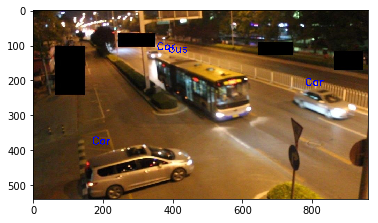

len of dec 4
len of classn 4


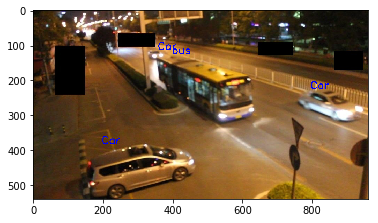

len of dec 4
len of classn 4


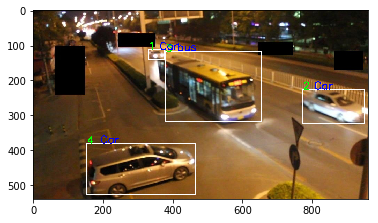

len of dec 3
len of classn 3


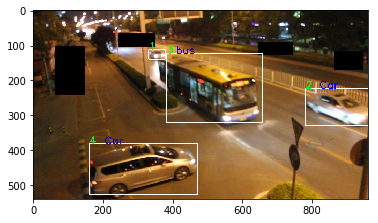

len of dec 3
len of classn 3


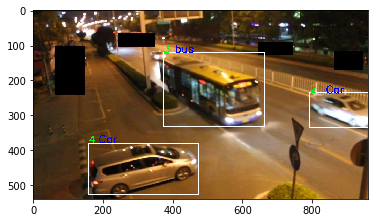

len of dec 3
len of classn 3


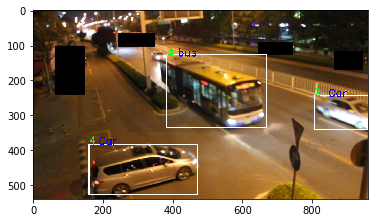

len of dec 3
len of classn 3


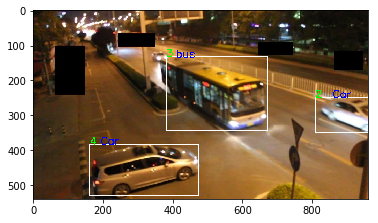

len of dec 4
len of classn 4


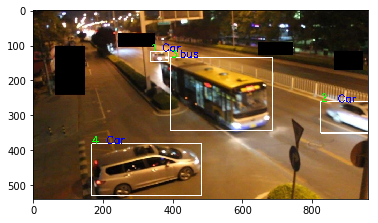

len of dec 4
len of classn 4


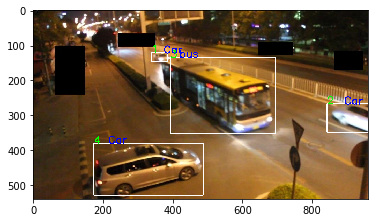

len of dec 4
len of classn 4


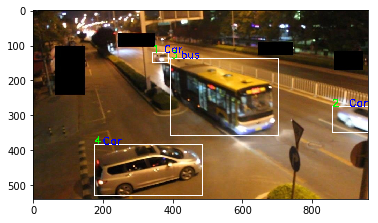

In [60]:
Multiobjecttracking(path = pathtofolder,video = False,outfile ="MVI_39861_tracked",writetovideo = False , Maxno = 10, category_index = category_index)

In [0]:
Multiobjecttracking( path = pathtofolder,video = False,outfile ="MVI_39861_tracked",writetovideo = True, category_index = category_index)

In [0]:
#test with orgigial bounding
Multiobjecttracking( path = pathtofolder,video = False,outfile ="MVI_39861_tracked_c",writetovideo = True,Maxno = 200 , category_index = category_index)

In [0]:
pathtovideo = "/content/mobile_test.mp4"


In [0]:
Multiobjecttracking( path = pathtovideo,video = True,outfile ="Mobiletest_tracked",clean = True, writetovideo = True, Maxno = 500,category_index = category_index)

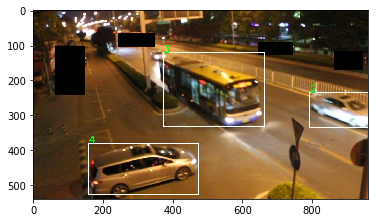

In [0]:
path = "/content/deep_sort_yolov3/image_i.jpg"

image = Image.open(path)
fig, ax = plt.subplots()
image = np.array(image)

ax.imshow(image)